In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler ## minmaxscaler for normalization
from sklearn.preprocessing import StandardScaler ## Standard scaler for standardization
from sklearn.model_selection import train_test_split ## to split the given df into train and test 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv(r"C:\Users\cchap\OneDrive\Desktop\Student Mental healthRefine.csv")
data.head()

,Unnamed: 0,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc
0,0,18,Engineering,year 1,A+,0,0,1,0,1,0,4.0,1
1,1,21,Islamic Education,year 2,A+,1,0,0,1,0,0,4.0,2
2,2,19,BIT,year 1,A+,1,0,1,1,1,0,4.0,1
3,3,22,Law,year 3,A+,0,1,1,0,0,0,4.0,3
4,4,23,Mathemathics,year 4,A+,1,0,0,0,0,0,4.0,4


In [3]:
data.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [4]:
data.head()

,age,course,year,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc
0,18,Engineering,year 1,A+,0,0,1,0,1,0,4.0,1
1,21,Islamic Education,year 2,A+,1,0,0,1,0,0,4.0,2
2,19,BIT,year 1,A+,1,0,1,1,1,0,4.0,1
3,22,Law,year 3,A+,0,1,1,0,0,0,4.0,3
4,23,Mathemathics,year 4,A+,1,0,0,0,0,0,4.0,4


In [5]:
math_data=data.drop(columns="year")

In [6]:
math_data.head()

,age,course,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc
0,18,Engineering,A+,0,0,1,0,1,0,4.0,1
1,21,Islamic Education,A+,1,0,0,1,0,0,4.0,2
2,19,BIT,A+,1,0,1,1,1,0,4.0,1
3,22,Law,A+,0,1,1,0,0,0,4.0,3
4,23,Mathemathics,A+,1,0,0,0,0,0,4.0,4


## Total no of depression student with male and femle ratio

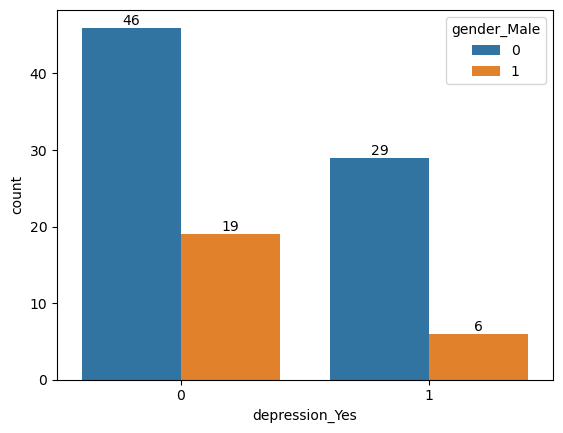

In [7]:
ax=sns.countplot(x="depression_Yes", data=math_data,hue="gender_Male")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Total no of anxiety student with male and femle ratio

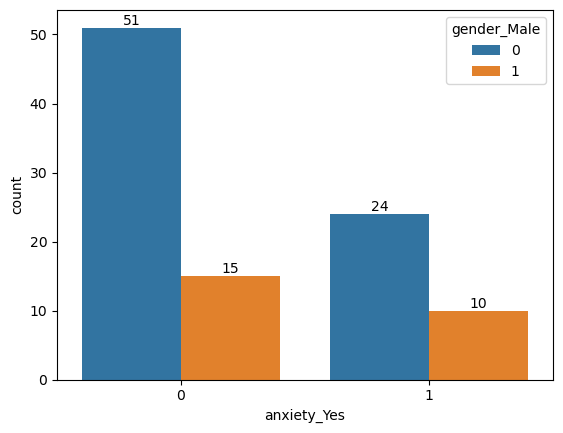

In [8]:
ax=sns.countplot(x="anxiety_Yes", data=math_data,hue="gender_Male")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Total no of panic student with male and femle ratio

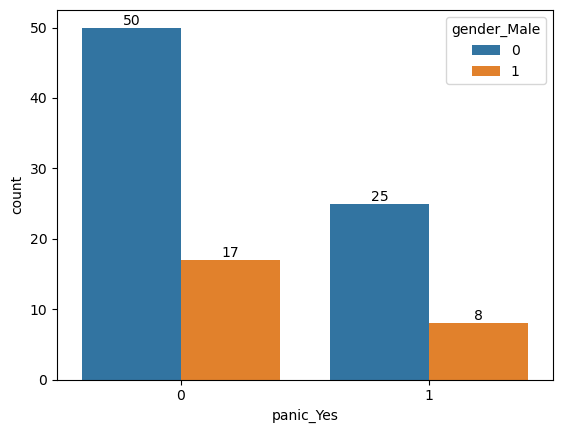

In [9]:
ax=sns.countplot(x="panic_Yes", data=math_data,hue="gender_Male")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Total no of panic student with male and femle ratio

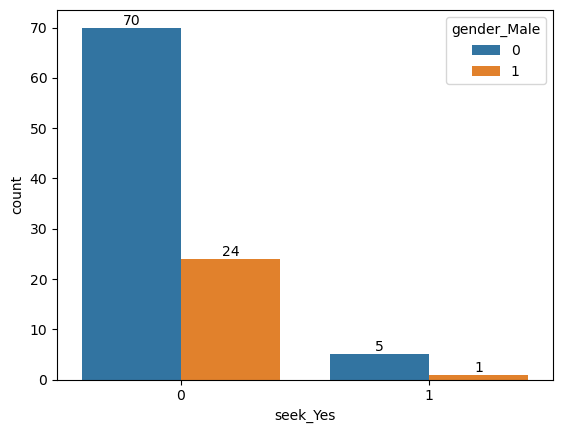

In [10]:
ax=sns.countplot(x="seek_Yes", data=math_data,hue="gender_Male")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Total no of panic student with male and femle ratio

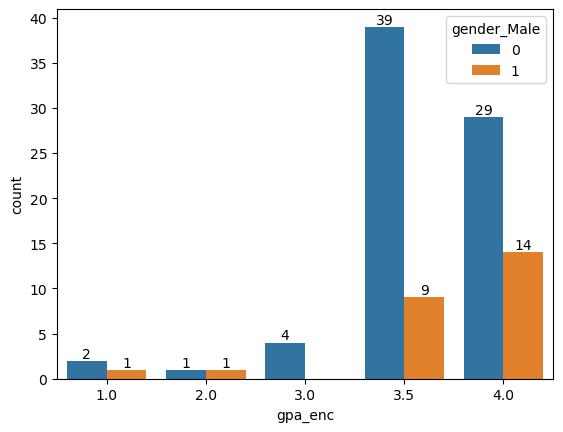

In [11]:
ax=sns.countplot(x="gpa_enc", data=math_data,hue="gender_Male")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## need to label encode the value of course using label encoder


In [12]:
le=LabelEncoder()

In [13]:
math_data["course_enc"]=le.fit_transform(math_data["course"])

In [44]:
math_data

,age,course,gpa,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,gpa_enc,year_enc,course_enc
0,18,Engineering,A+,0,0,1,0,1,0,4.0,1,15
1,21,Islamic Education,A+,1,0,0,1,0,0,4.0,2,22
2,19,BIT,A+,1,0,1,1,1,0,4.0,1,3
3,22,Law,A+,0,1,1,0,0,0,4.0,3,28
4,23,Mathemathics,A+,1,0,0,0,0,0,4.0,4,32
...,...,...,...,...,...,...,...,...,...,...,...,...
95,21,BCS,A,0,0,0,1,0,0,3.5,1,2
96,18,Engineering,A+,1,0,1,1,0,0,4.0,2,15
97,19,Nursing,A,0,1,1,0,1,0,3.5,3,33
98,23,Pendidikan Islam,A,0,0,0,0,0,0,3.5,4,34


## x= all column except gpa(independent variable)
## y= dependent variable (gpa_enc)

In [15]:
x=math_data.drop(columns=["course","gpa","gpa_enc"])
y=math_data["gpa_enc"]

In [16]:
x.head()

,age,gender_Male,marital_Yes,depression_Yes,anxiety_Yes,panic_Yes,seek_Yes,year_enc,course_enc
0,18,0,0,1,0,1,0,1,15
1,21,1,0,0,1,0,0,2,22
2,19,1,0,1,1,1,0,1,3
3,22,0,1,1,0,0,0,3,28
4,23,1,0,0,0,0,0,4,32


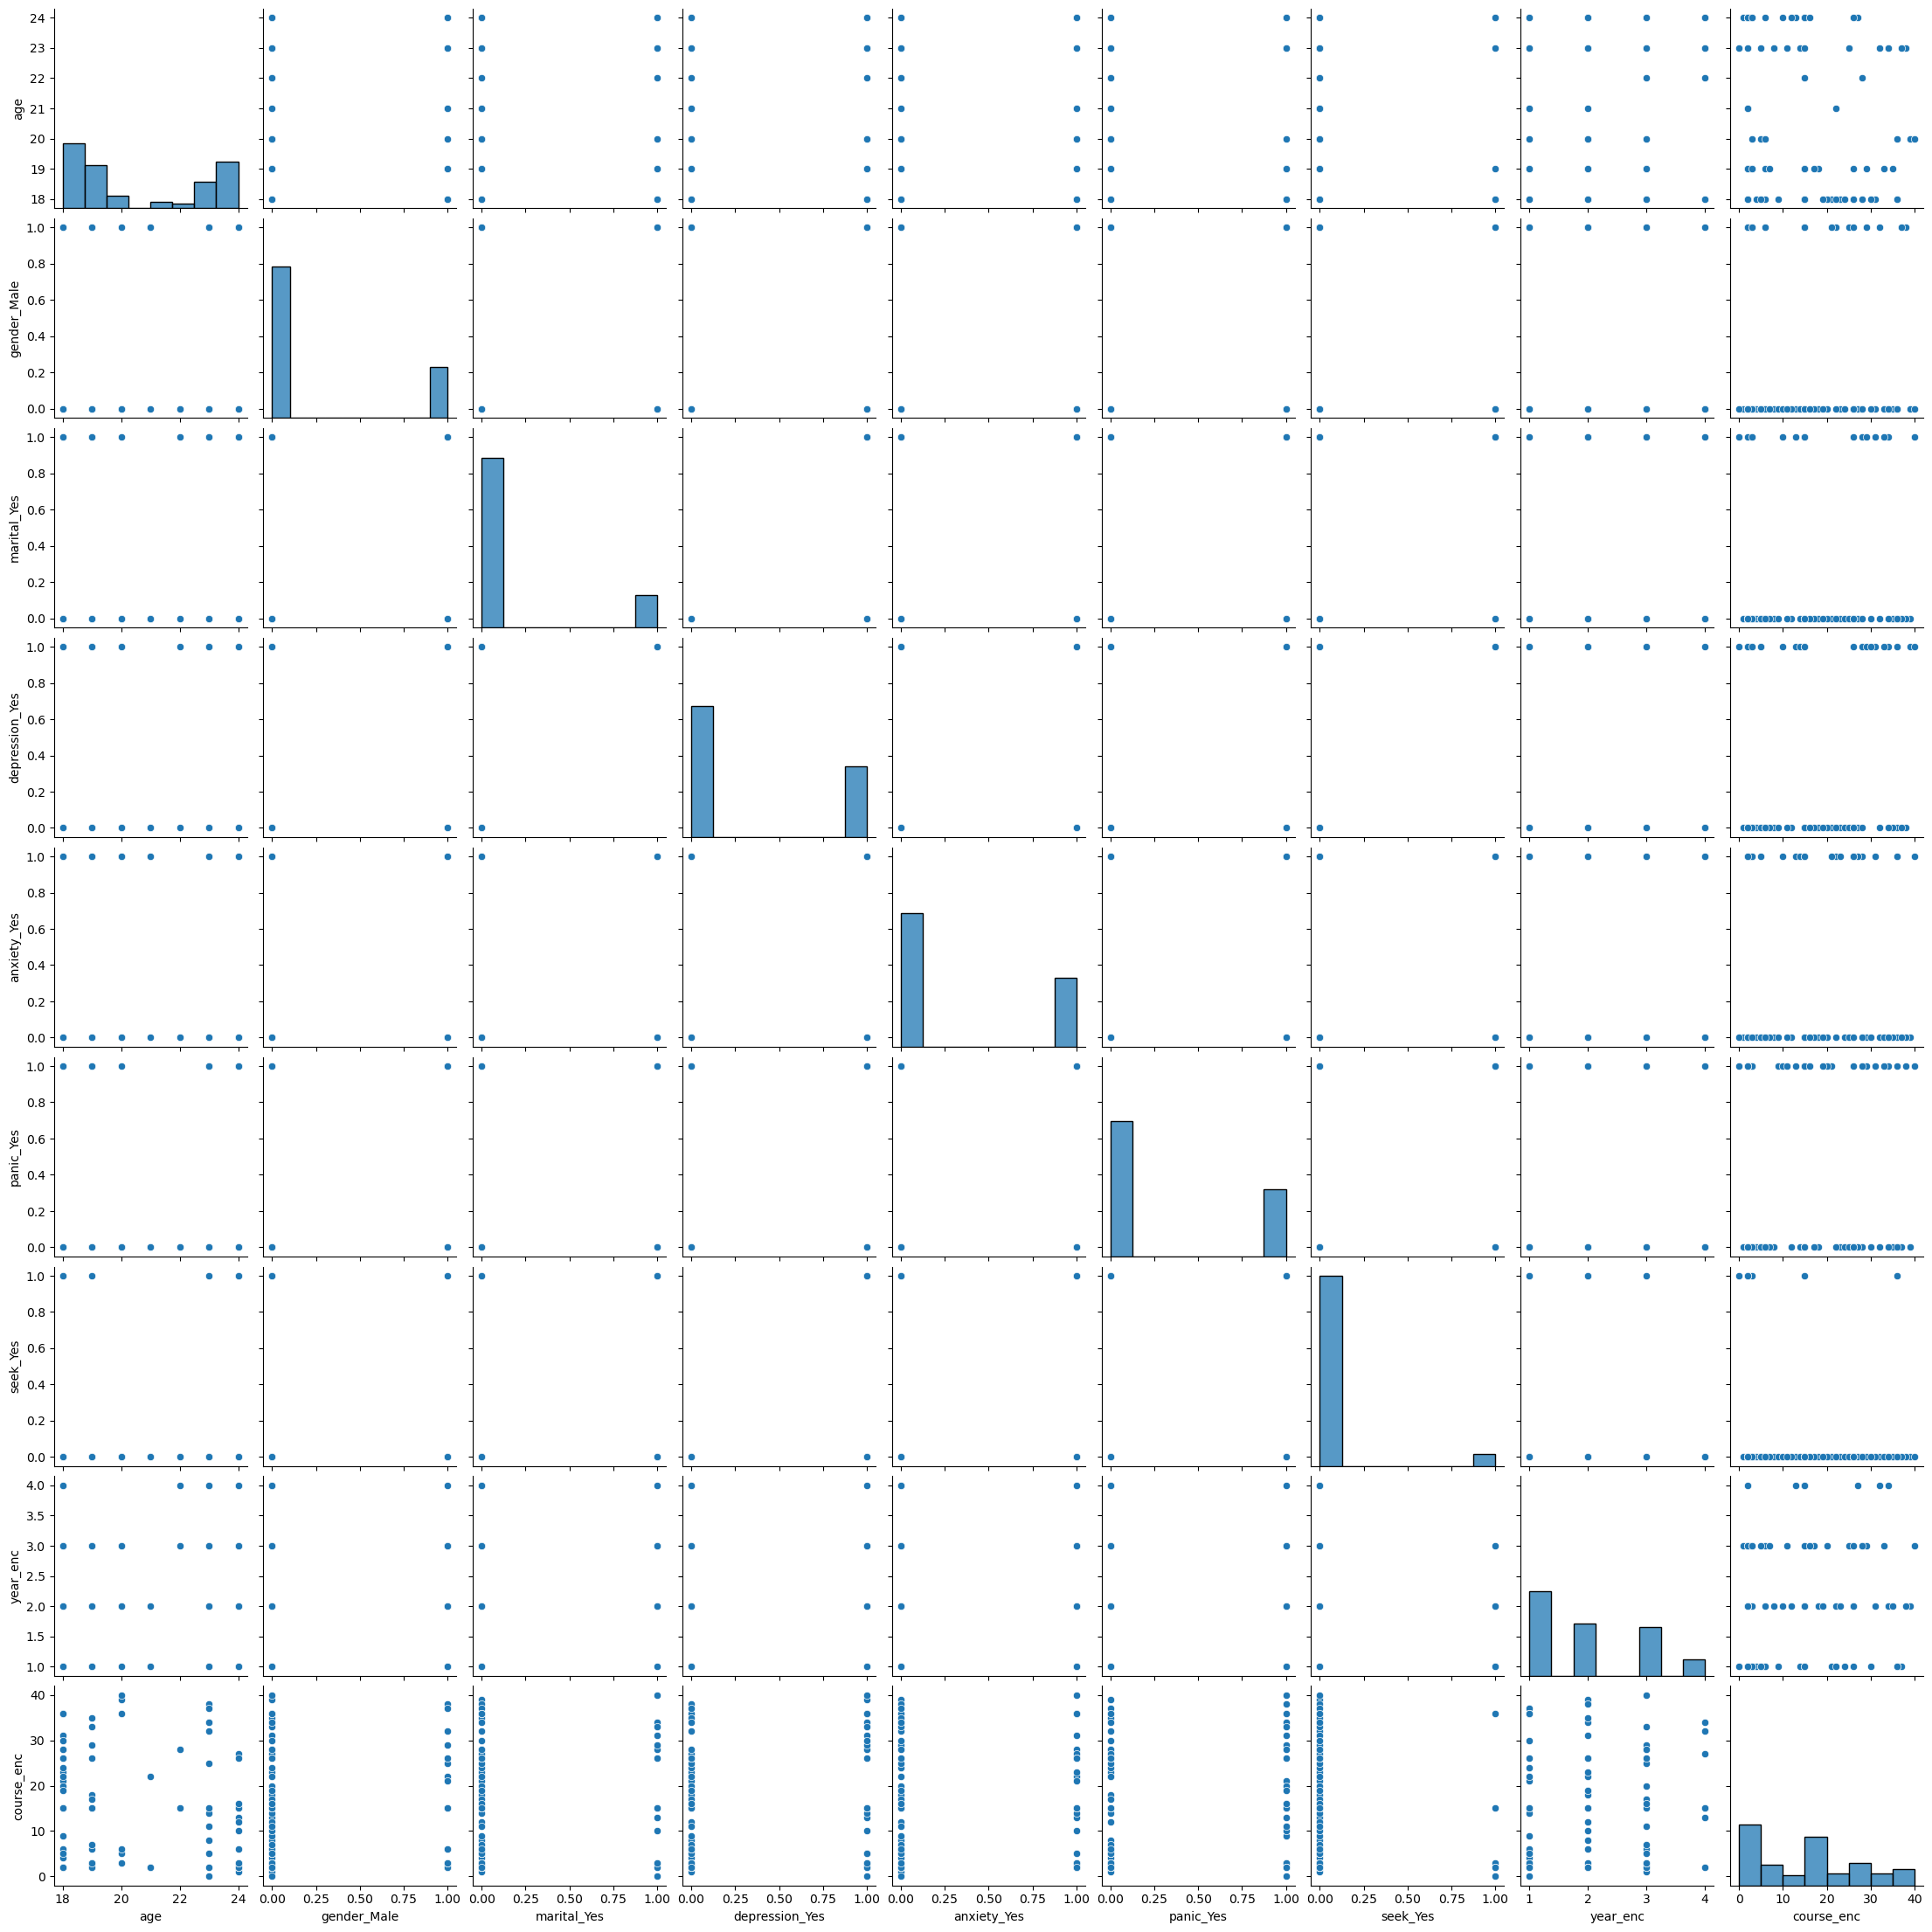

In [17]:
sns.pairplot(x)

## need to split the data into x_train, x_test, y_train and y_test 

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=10)

## Data should be done scaling either by standarization or normalization

## Standarization means mean=0 and std.Dev =1 

In [19]:
x_train.columns

Index(['age', 'gender_Male', 'marital_Yes', 'depression_Yes', 'anxiety_Yes',
       'panic_Yes', 'seek_Yes', 'year_enc', 'course_enc'],
      dtype='object')

In [20]:
sc=StandardScaler()

In [21]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [22]:
x_train_sc=pd.DataFrame(x_train_sc,columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc,columns=x_train.columns)


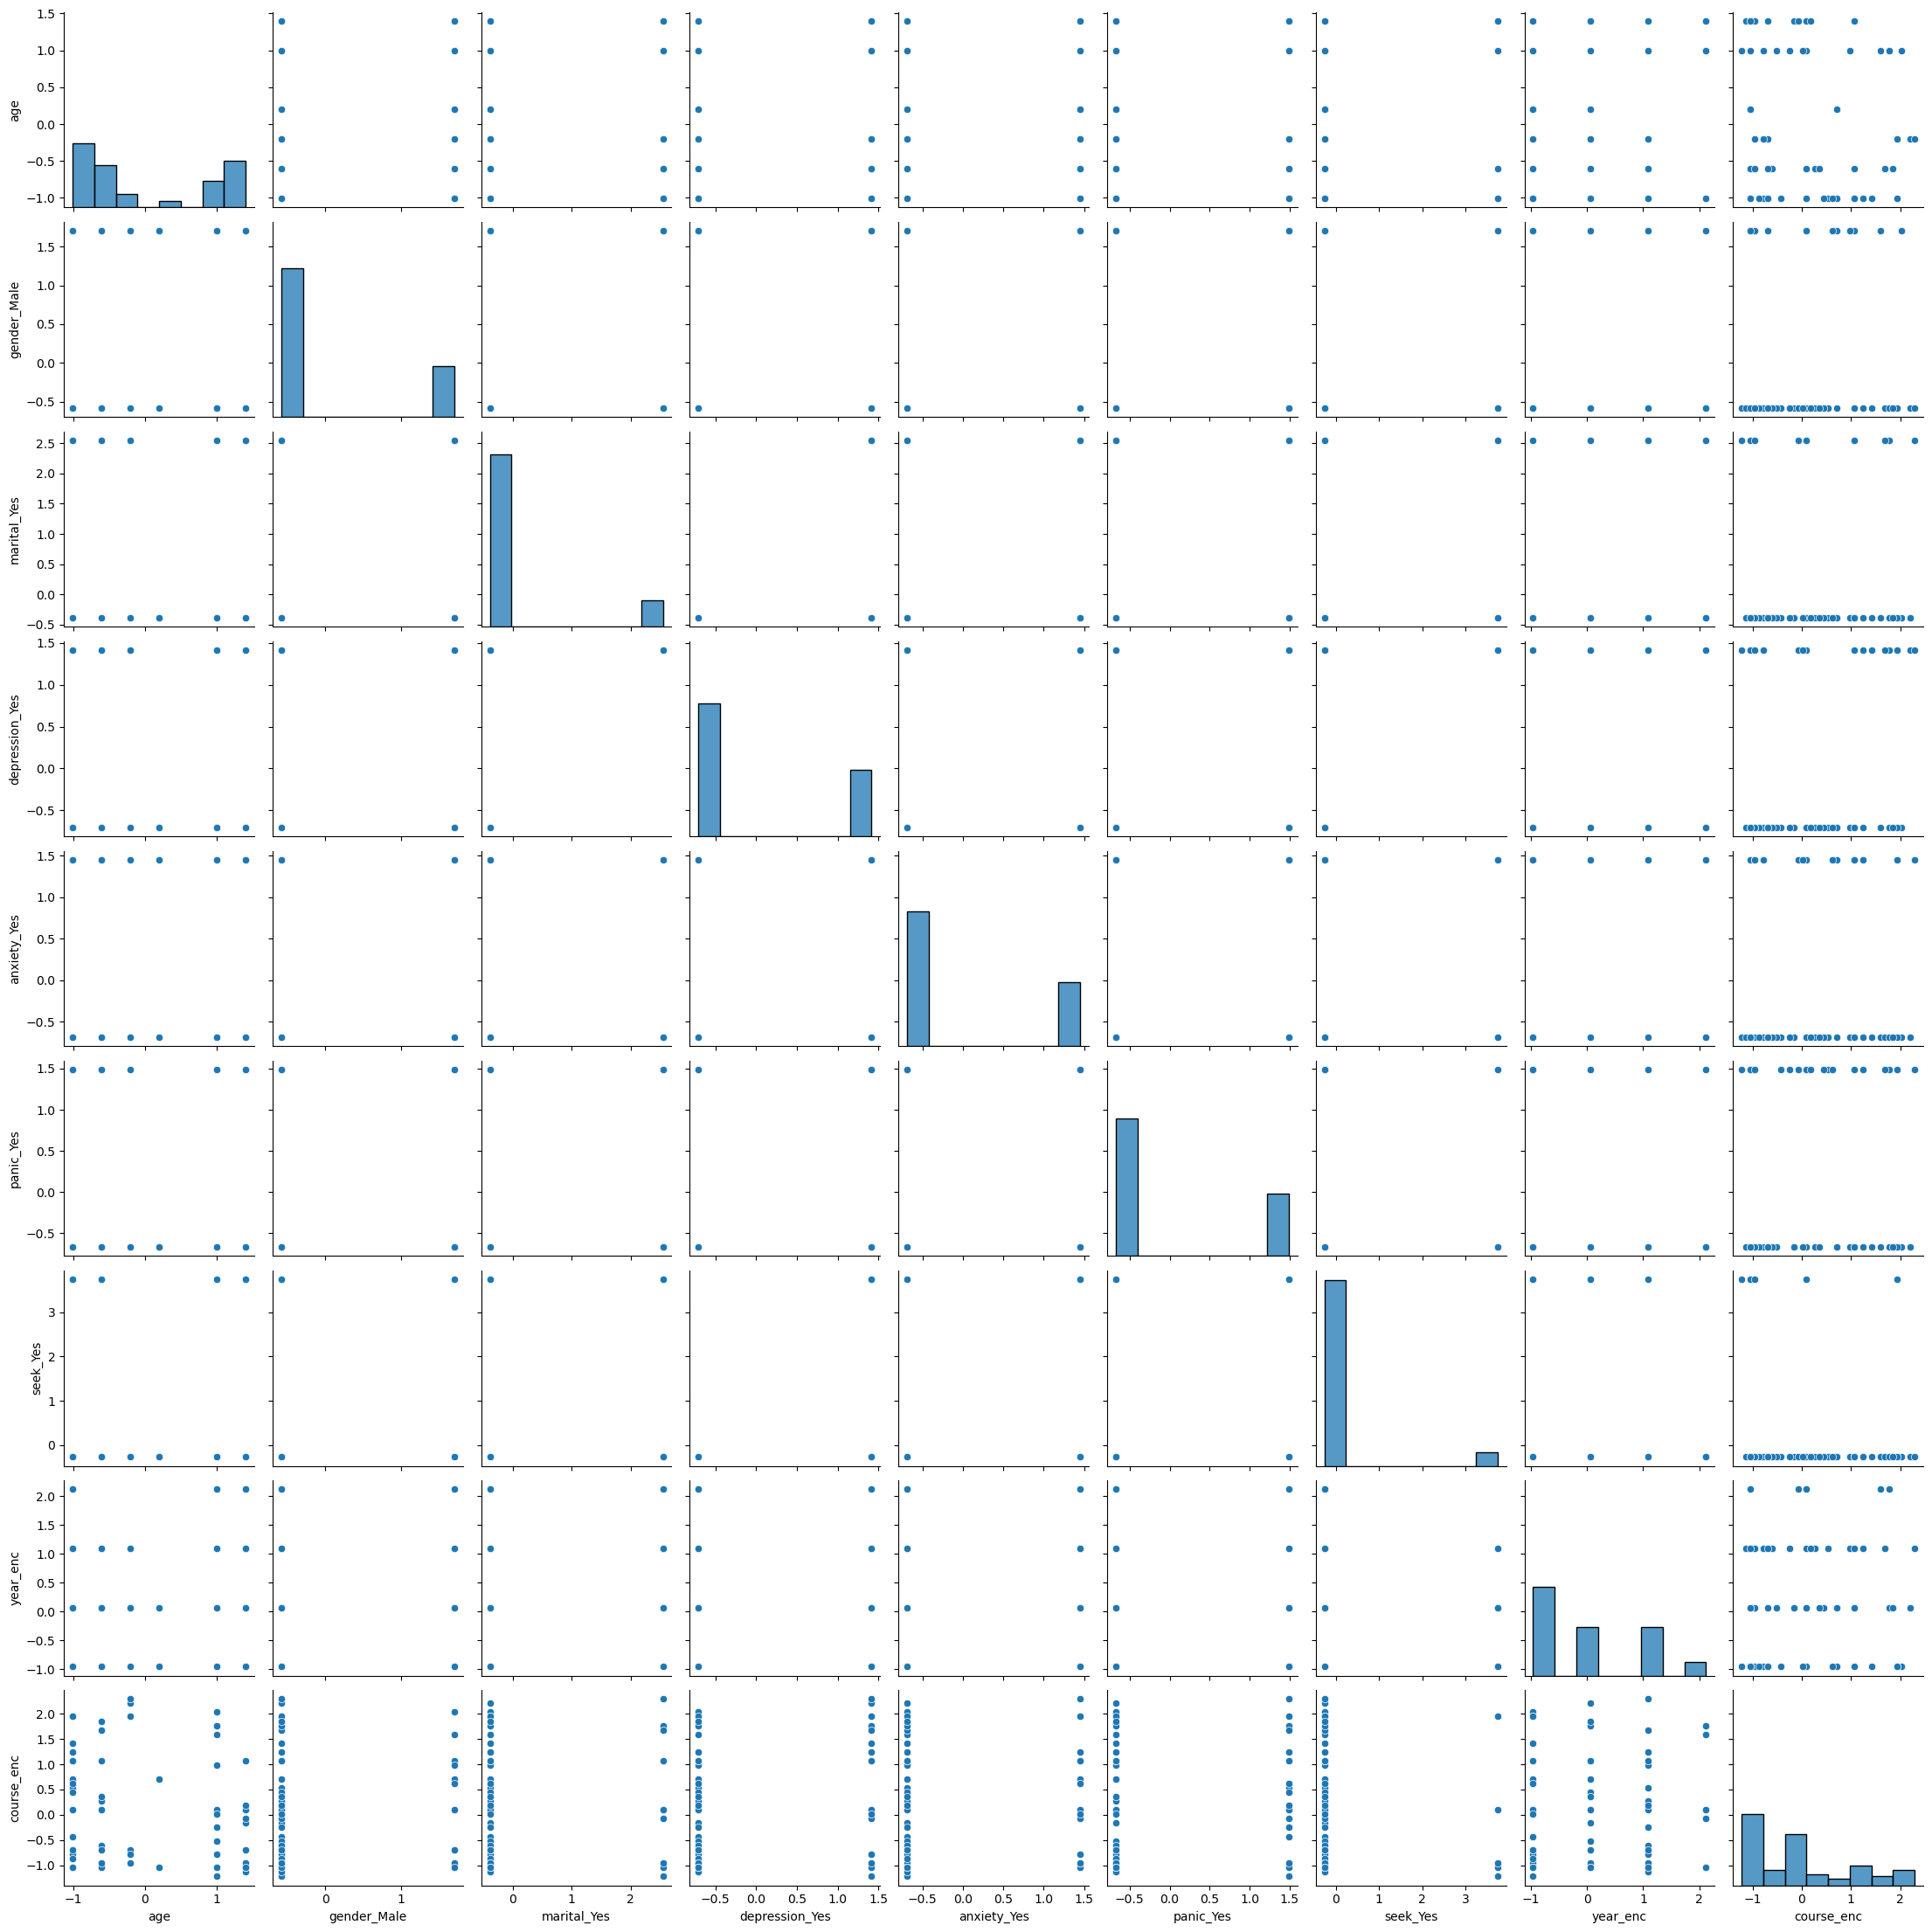

In [23]:
sns.pairplot(x_train_sc)

## min maxScaler also does the same task 

## using liner Regression model to predict the data 

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
lr.coef_

array([ 0.00310085,  0.03028693, -0.03908456,  0.33231674,  0.17043406,
       -0.20177515, -0.43188226, -0.0096668 ,  0.00310005])

In [27]:
lr.intercept_


3.4242333829398057

In [28]:
y_predict=lr.predict(x_test)

In [29]:
y_predict.shape

(10,)

In [30]:
y_test.shape

(10,)

## linear regression doesnot work on this categorical type data so usinsg logistic regression 

In [31]:
lr.score(x_test,y_test)

-0.1742895198737131

## using logistic Regression 

In [32]:
lo=LogisticRegression()

In [33]:
y_train.shape

(90,)

In [34]:
x_train.shape

(90, 9)

## we need to perform the label encoding on ouput variables

In [49]:
le=LabelEncoder()

In [50]:
le.fit(y_train)

LabelEncoder()

In [56]:
## 
## 1- 0
## 2- 1
## 3- 2
## 3.5- 3
## 4-4

In [57]:
le.classes_


array([1. , 2. , 3. , 3.5, 4. ])

In [58]:
y_train=le.transform(y_train)
y_test=le.transform(y_test)

ValueError: y contains previously unseen labels: [0]

In [59]:
y_train

array([4, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4,
       3, 4, 1, 2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4,
       3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 1, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 0, 4, 4, 2, 3, 0, 3, 3, 4, 3, 4, 4, 4, 4, 3, 2, 3, 0, 3, 3, 3,
       3, 3], dtype=int64)

In [60]:
y_test

array([3, 3, 3, 2, 4, 4, 3, 3, 3, 4], dtype=int64)

In [61]:
lo.fit(x_train,y_train)

C:\Users\cchap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
lo.score(x_test,y_test)

0.8

## logistic regression provides 80% accurate data on the given dataframe 